# Week 2 Assignment - YOLO

Arpit Jain

22B0078

In [1]:
!nvidia-smi

Sat Jul 13 05:51:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Install `ultralytics`

In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 10.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/107.7 GB disk)


In [4]:
# Change the working directory
%cd "/content/drive/MyDrive/Learner Space/ML/Assignment_2"

/content/drive/MyDrive/Learner Space/ML/Assignment_2


# Yolov8 Model

Here the pre-trained model used is `yolov8m` imported from `YOLO`

* The number of `epochs` are 50
* The image size is `640`
* The learning rate is `0.01`
* The batch size size is set to `32`

In [11]:
from ultralytics import YOLO

model = YOLO('yolov8.yaml')
model = YOLO('yolov8m.pt')
model = YOLO('yolov8m.yaml').load("yolov8m.pt")
model.train(data="/content/drive/MyDrive/Learner Space/ML/Assignment_2/data.yaml",
            epochs=25,
            imgsz=640,
            lr0=0.05,
            batch=32)
metrics = model.val()

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Transferred 475/475 items from pretrained weights
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/drive/MyDrive/Learner Space/ML/Assignment_2/data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.0MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Learner Space/ML/Assignment_2/car/train/labels.cache... 1509 images, 8 backgrounds, 0 corrupt: 100%|██████████| 1517/1517 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Learner Space/ML/Assignment_2/car/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      14.3G     0.9508      2.228      1.309        191        640: 100%|██████████| 48/48 [01:22<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.80s/it]

                   all        160       1055      0.448      0.614      0.501      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      15.1G     0.8033        1.1      1.166        137        640: 100%|██████████| 48/48 [01:17<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]

                   all        160       1055      0.515      0.596      0.565      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      15.2G     0.7675     0.9236      1.139        178        640: 100%|██████████| 48/48 [01:15<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]

                   all        160       1055      0.656      0.522      0.562      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      15.2G     0.7713     0.8978      1.142        139        640: 100%|██████████| 48/48 [01:15<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]

                   all        160       1055      0.618      0.549      0.575       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      15.2G     0.7258     0.8106       1.11        189        640: 100%|██████████| 48/48 [01:14<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]

                   all        160       1055      0.595      0.629      0.633      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      15.2G     0.6981      0.742      1.092        161        640: 100%|██████████| 48/48 [01:15<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]

                   all        160       1055      0.603      0.646      0.648      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      14.7G     0.6656     0.6663      1.065        140        640: 100%|██████████| 48/48 [01:13<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.34s/it]

                   all        160       1055       0.66      0.663      0.667      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      14.7G     0.6435     0.6352      1.054        143        640: 100%|██████████| 48/48 [01:12<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.51s/it]

                   all        160       1055      0.708      0.636       0.68      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      15.2G      0.621     0.6048      1.038        155        640: 100%|██████████| 48/48 [01:12<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.30s/it]

                   all        160       1055      0.671      0.652       0.67      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      15.2G      0.592     0.5729      1.023        189        640: 100%|██████████| 48/48 [01:13<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.13s/it]

                   all        160       1055      0.655      0.616      0.628       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25        15G     0.5742     0.5317      1.013        170        640: 100%|██████████| 48/48 [01:10<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.69s/it]

                   all        160       1055       0.72      0.727      0.733      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      15.2G     0.5537      0.503     0.9953        221        640: 100%|██████████| 48/48 [01:09<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]

                   all        160       1055      0.705      0.724      0.727      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      15.2G     0.5416     0.4973      0.993        168        640: 100%|██████████| 48/48 [01:10<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]

                   all        160       1055      0.726      0.702      0.718      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      15.2G     0.5165      0.461     0.9793        146        640: 100%|██████████| 48/48 [01:13<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

                   all        160       1055      0.732       0.69      0.727       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      15.2G     0.5071     0.4489     0.9745        168        640: 100%|██████████| 48/48 [01:10<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.75s/it]

                   all        160       1055      0.727      0.676      0.708      0.528


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      15.2G     0.4666     0.3949       0.95         75        640: 100%|██████████| 48/48 [01:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.70s/it]

                   all        160       1055      0.714       0.67      0.711      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      15.1G     0.4498     0.3694      0.933         85        640: 100%|██████████| 48/48 [00:56<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.18s/it]

                   all        160       1055      0.722       0.72      0.711      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      15.2G     0.4238     0.3471     0.9187         75        640: 100%|██████████| 48/48 [00:59<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]

                   all        160       1055      0.744      0.735      0.759      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      15.2G     0.4074     0.3282     0.9149         72        640: 100%|██████████| 48/48 [01:00<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]

                   all        160       1055       0.77      0.709      0.747      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      15.1G     0.3756     0.3019     0.8924        113        640: 100%|██████████| 48/48 [00:59<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

                   all        160       1055      0.763      0.756      0.775      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      14.7G     0.3654     0.2884     0.8901         76        640: 100%|██████████| 48/48 [00:57<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.02s/it]

                   all        160       1055      0.748      0.727      0.752      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      15.2G     0.3427     0.2684     0.8753         68        640: 100%|██████████| 48/48 [00:53<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]

                   all        160       1055      0.784      0.742      0.761      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      14.6G     0.3268       0.26       0.87         78        640: 100%|██████████| 48/48 [00:53<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]

                   all        160       1055      0.752      0.732       0.76      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      15.1G      0.313      0.249     0.8665         86        640: 100%|██████████| 48/48 [00:53<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]

                   all        160       1055      0.771      0.725      0.759      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      15.2G     0.3024     0.2448     0.8655         96        640: 100%|██████████| 48/48 [00:54<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all        160       1055      0.796      0.705      0.765        0.6



25 epochs completed in 0.528 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]


                   all        160       1055      0.797      0.706      0.765      0.601
                  boot         35         39      0.689      0.569      0.682      0.582
                   car        142        145      0.929      0.966      0.957      0.904
                  door         50         52      0.949      0.713      0.897      0.689
          front_bumper         30         30      0.677        0.5      0.629      0.524
           front_grill         49         51      0.696      0.627       0.68      0.581
      front_windshield         54         56       0.94      0.835      0.931      0.765
              headlamp         76        117      0.863      0.778      0.815      0.648
                  hood         50         50      0.708        0.7      0.783      0.666
         license_plate        114        117      0.838      0.838      0.848      0.661
                 panel         17         18      0.915      0.596      0.692      0.503
           rear_bumpe

val: Scanning /content/drive/MyDrive/Learner Space/ML/Assignment_2/car/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.30s/it]


                   all        160       1055      0.777      0.723      0.765        0.6
                  boot         35         39      0.675      0.639      0.682      0.581
                   car        142        145      0.918      0.972      0.957      0.904
                  door         50         52      0.936      0.731      0.898      0.694
          front_bumper         30         30      0.636      0.525      0.629      0.524
           front_grill         49         51      0.658      0.627      0.679      0.575
      front_windshield         54         56      0.892      0.883       0.93      0.769
              headlamp         76        117      0.853      0.795      0.815      0.648
                  hood         50         50      0.704        0.7      0.783      0.667
         license_plate        114        117      0.822      0.863      0.848      0.662
                 panel         17         18      0.916      0.609      0.692      0.502
           rear_bumpe

## Plots of the metrics of the model

### The Confusion Matrix

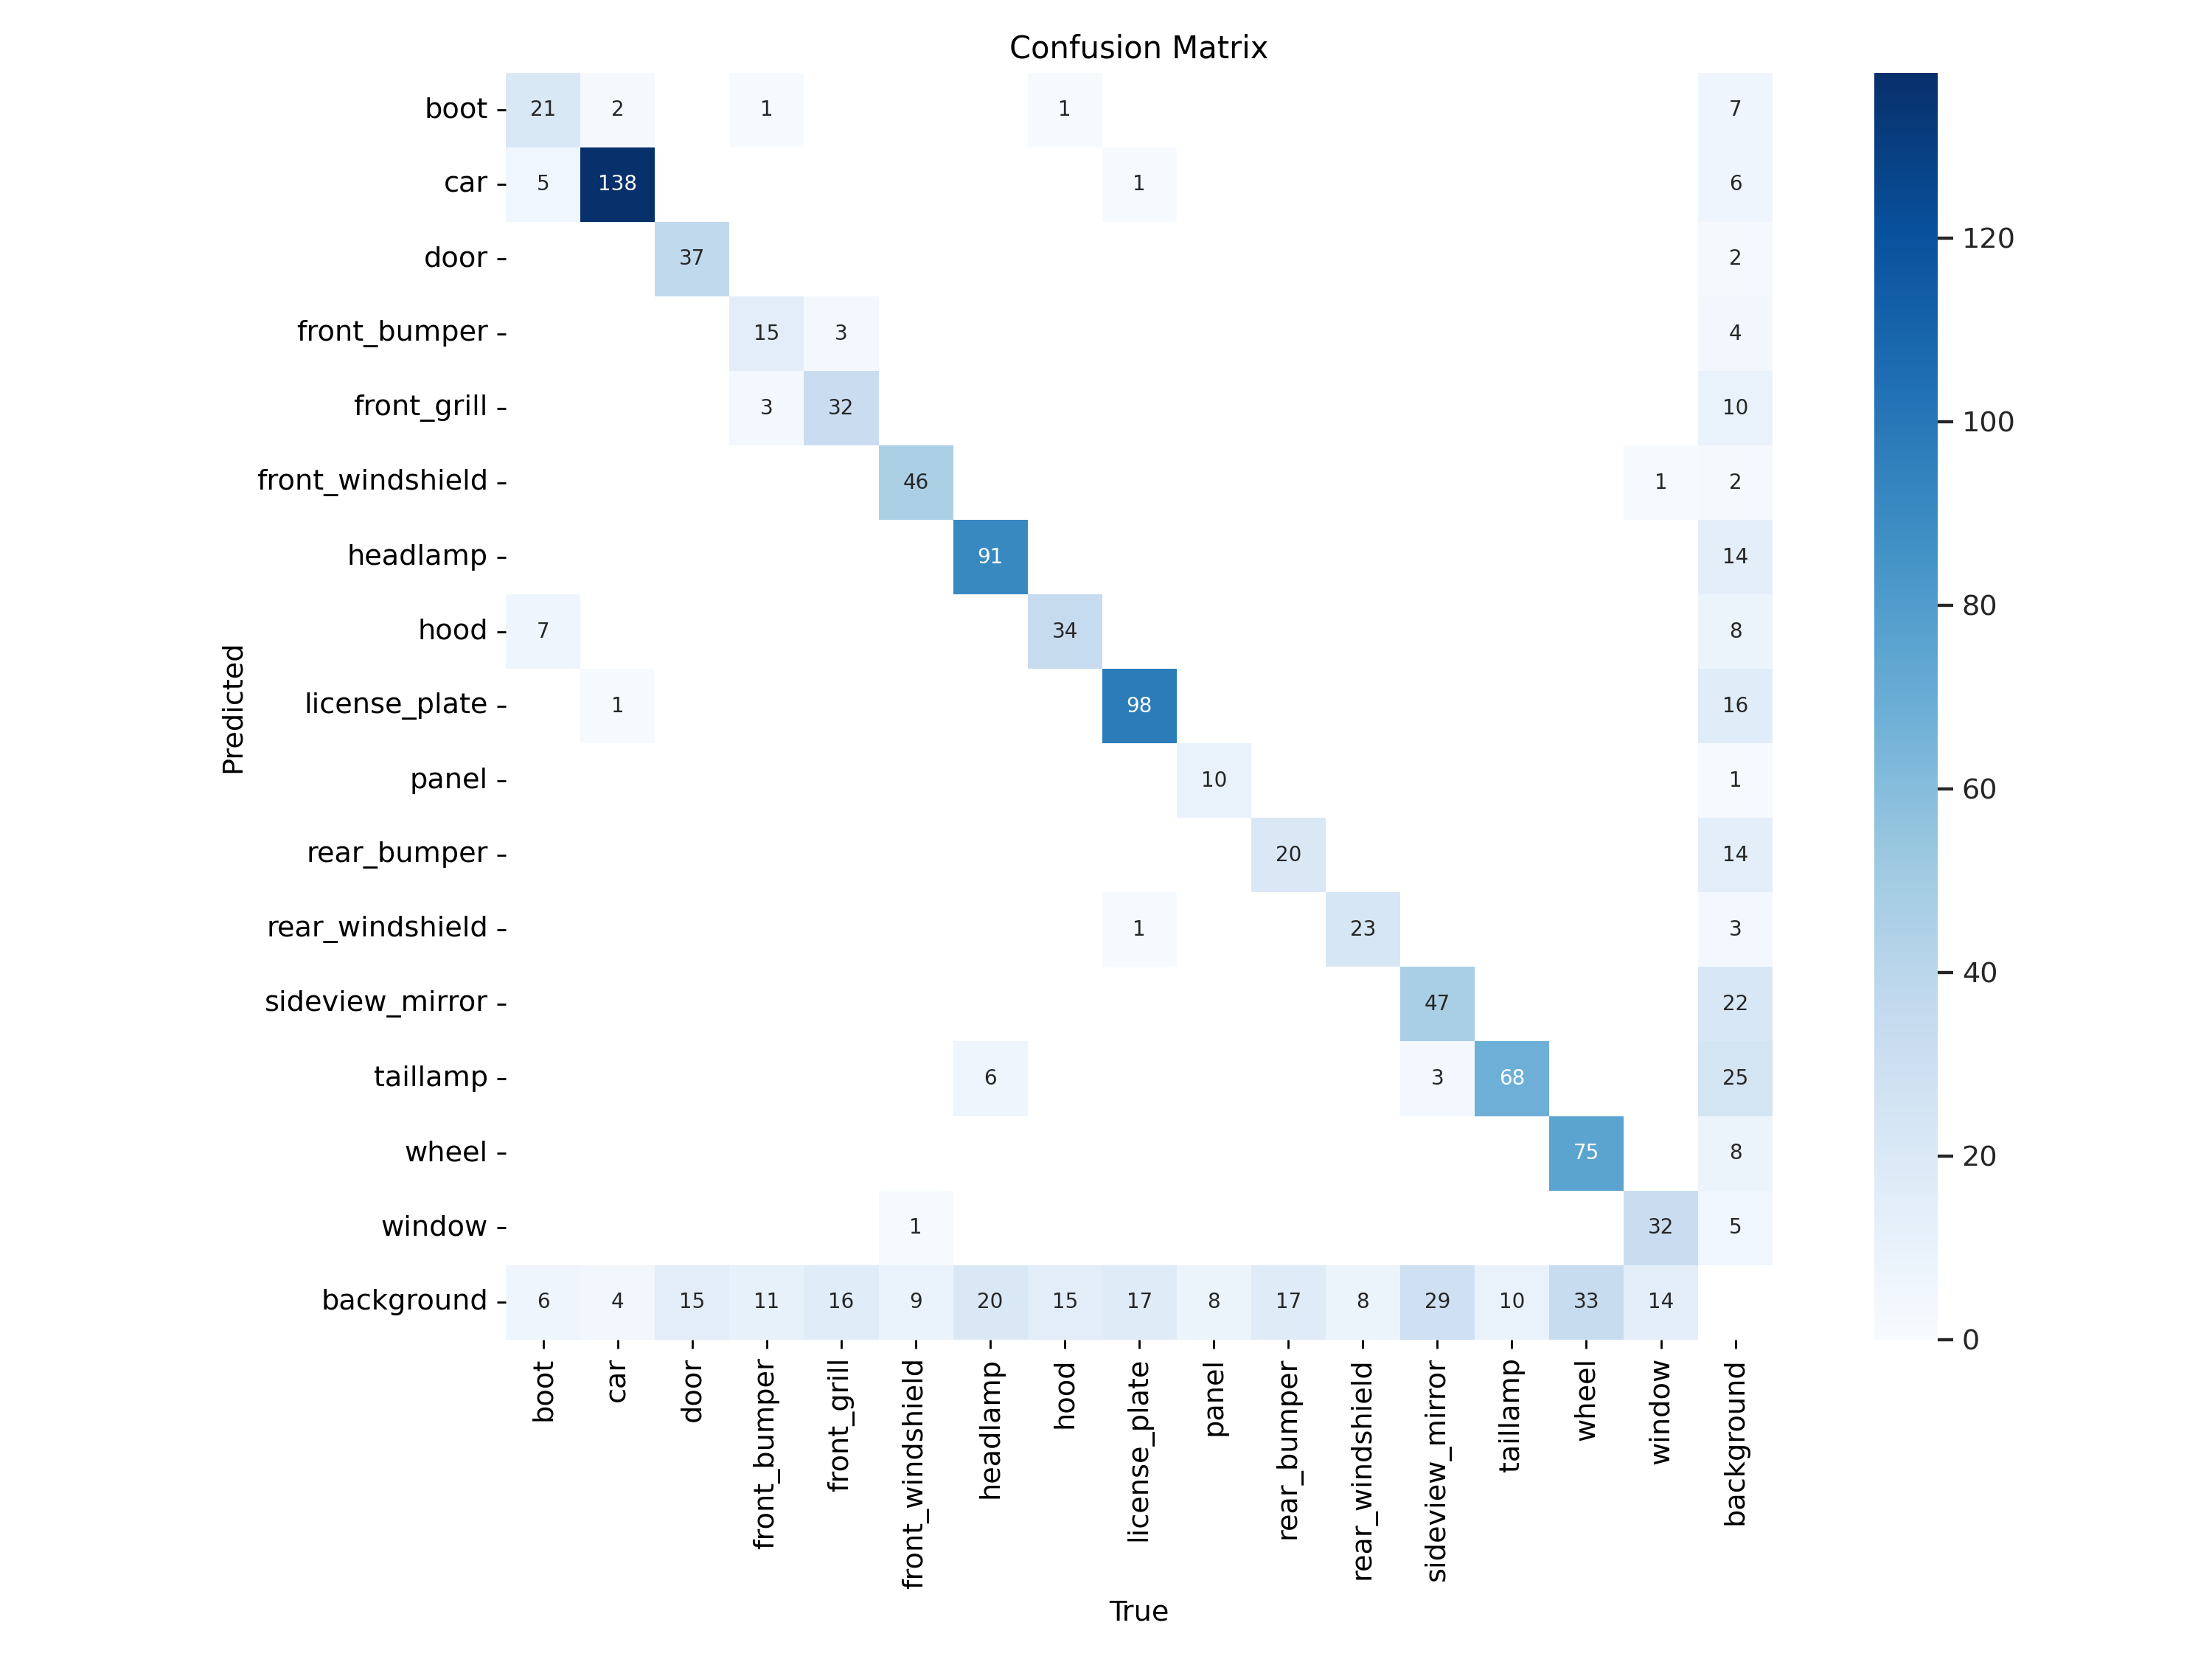

In [2]:
from IPython import display
display.Image("/content/drive/MyDrive/Learner Space/ML/Assignment_2/runs/detect/train/confusion_matrix.png", width=700)

### Reports

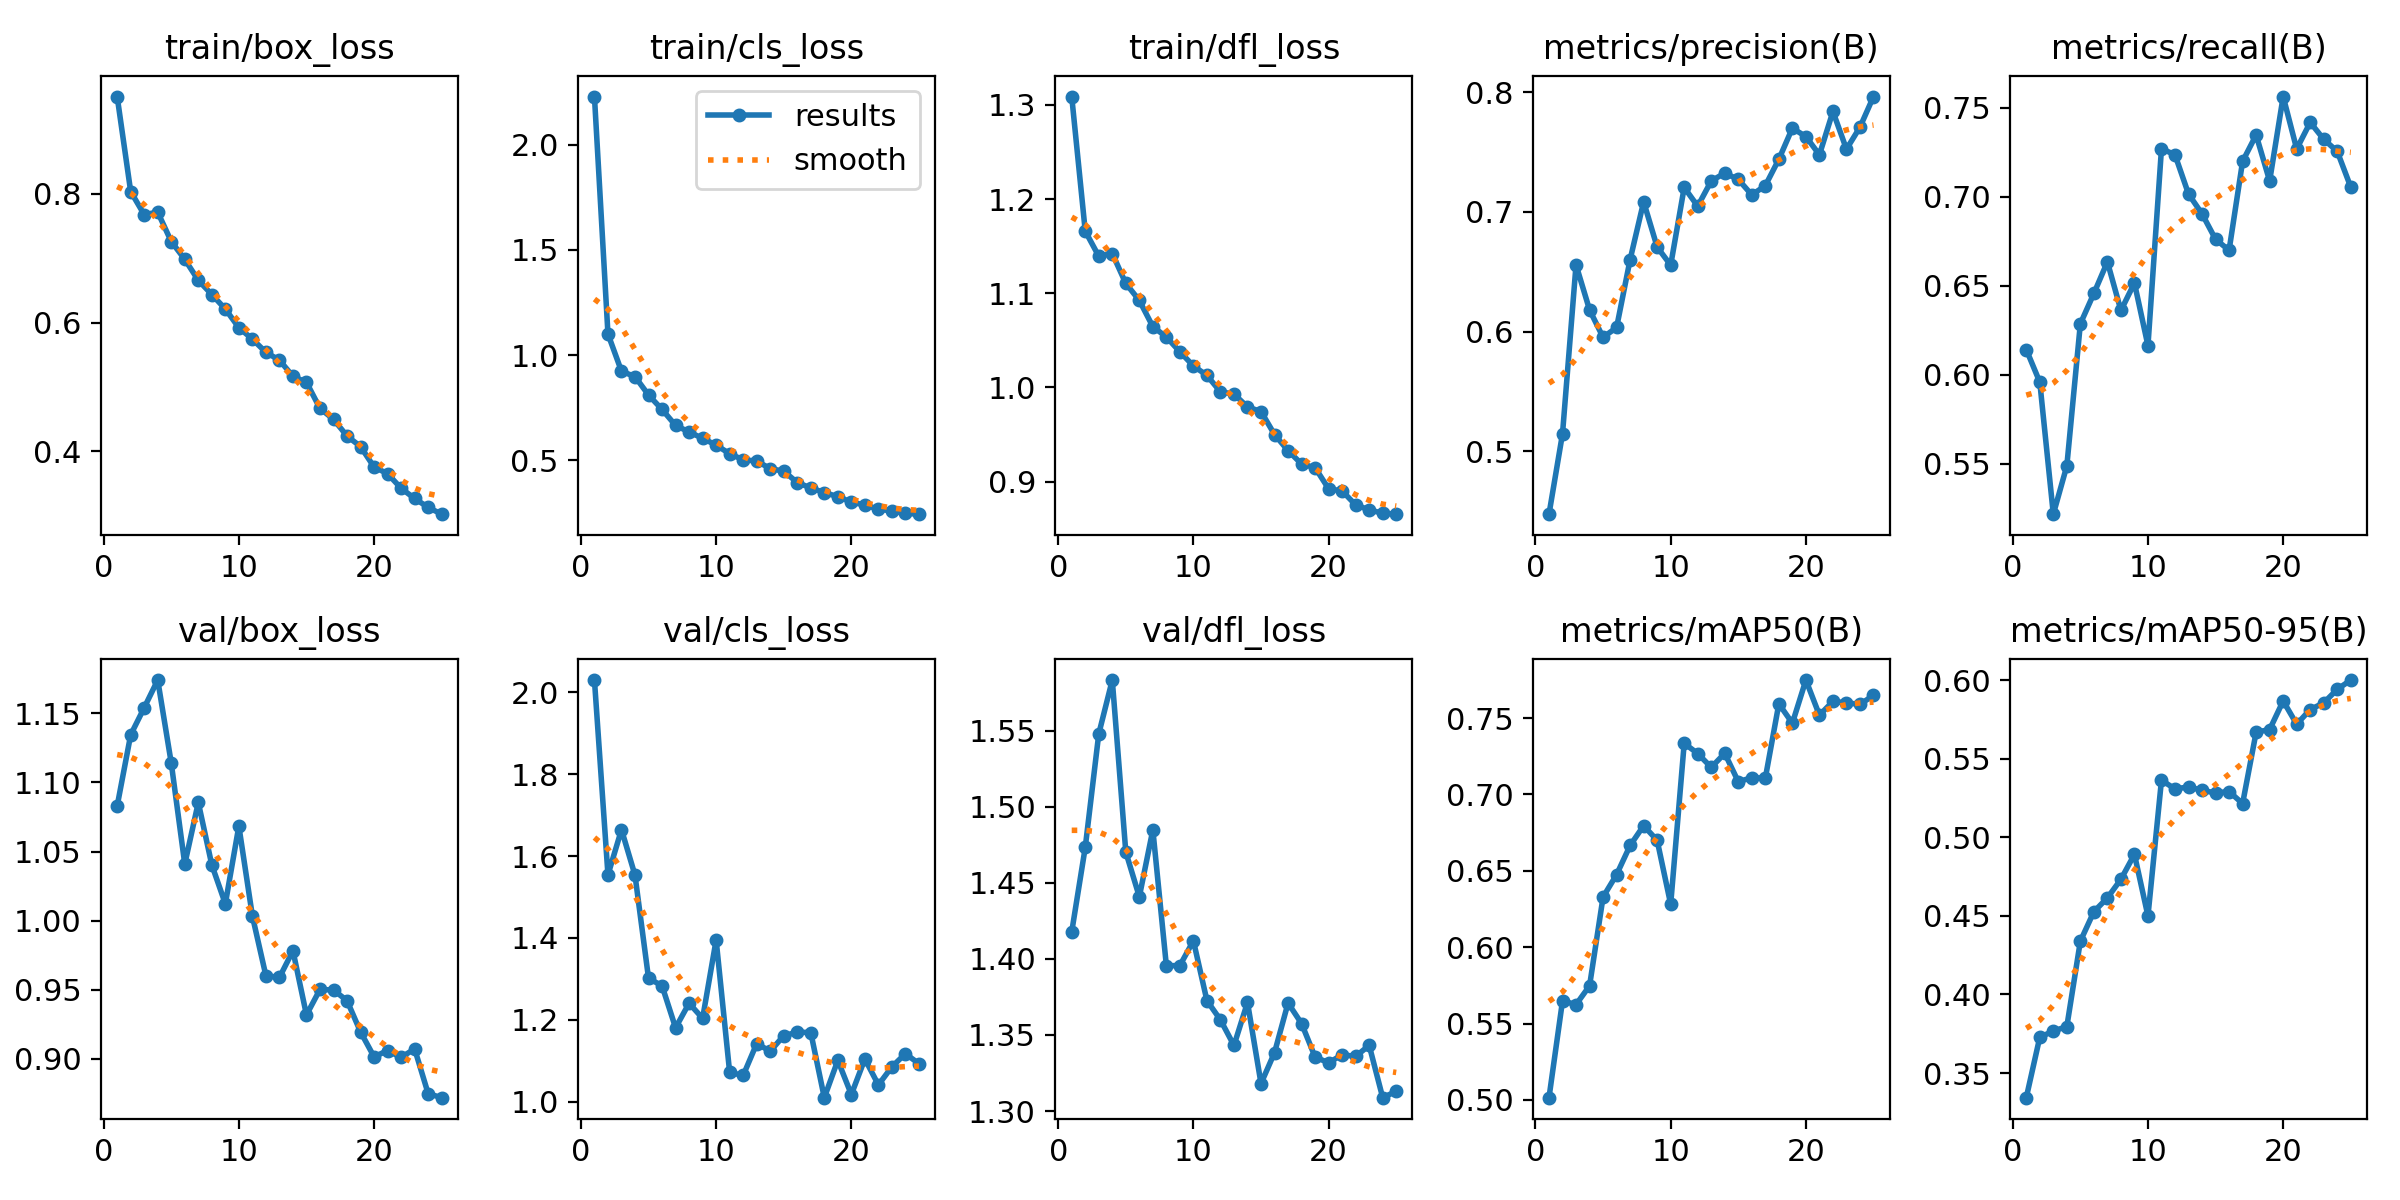

In [3]:
display.Image("/content/drive/MyDrive/Learner Space/ML/Assignment_2/runs/detect/train/results.png", width=700)

### The F1-Confidence Curve

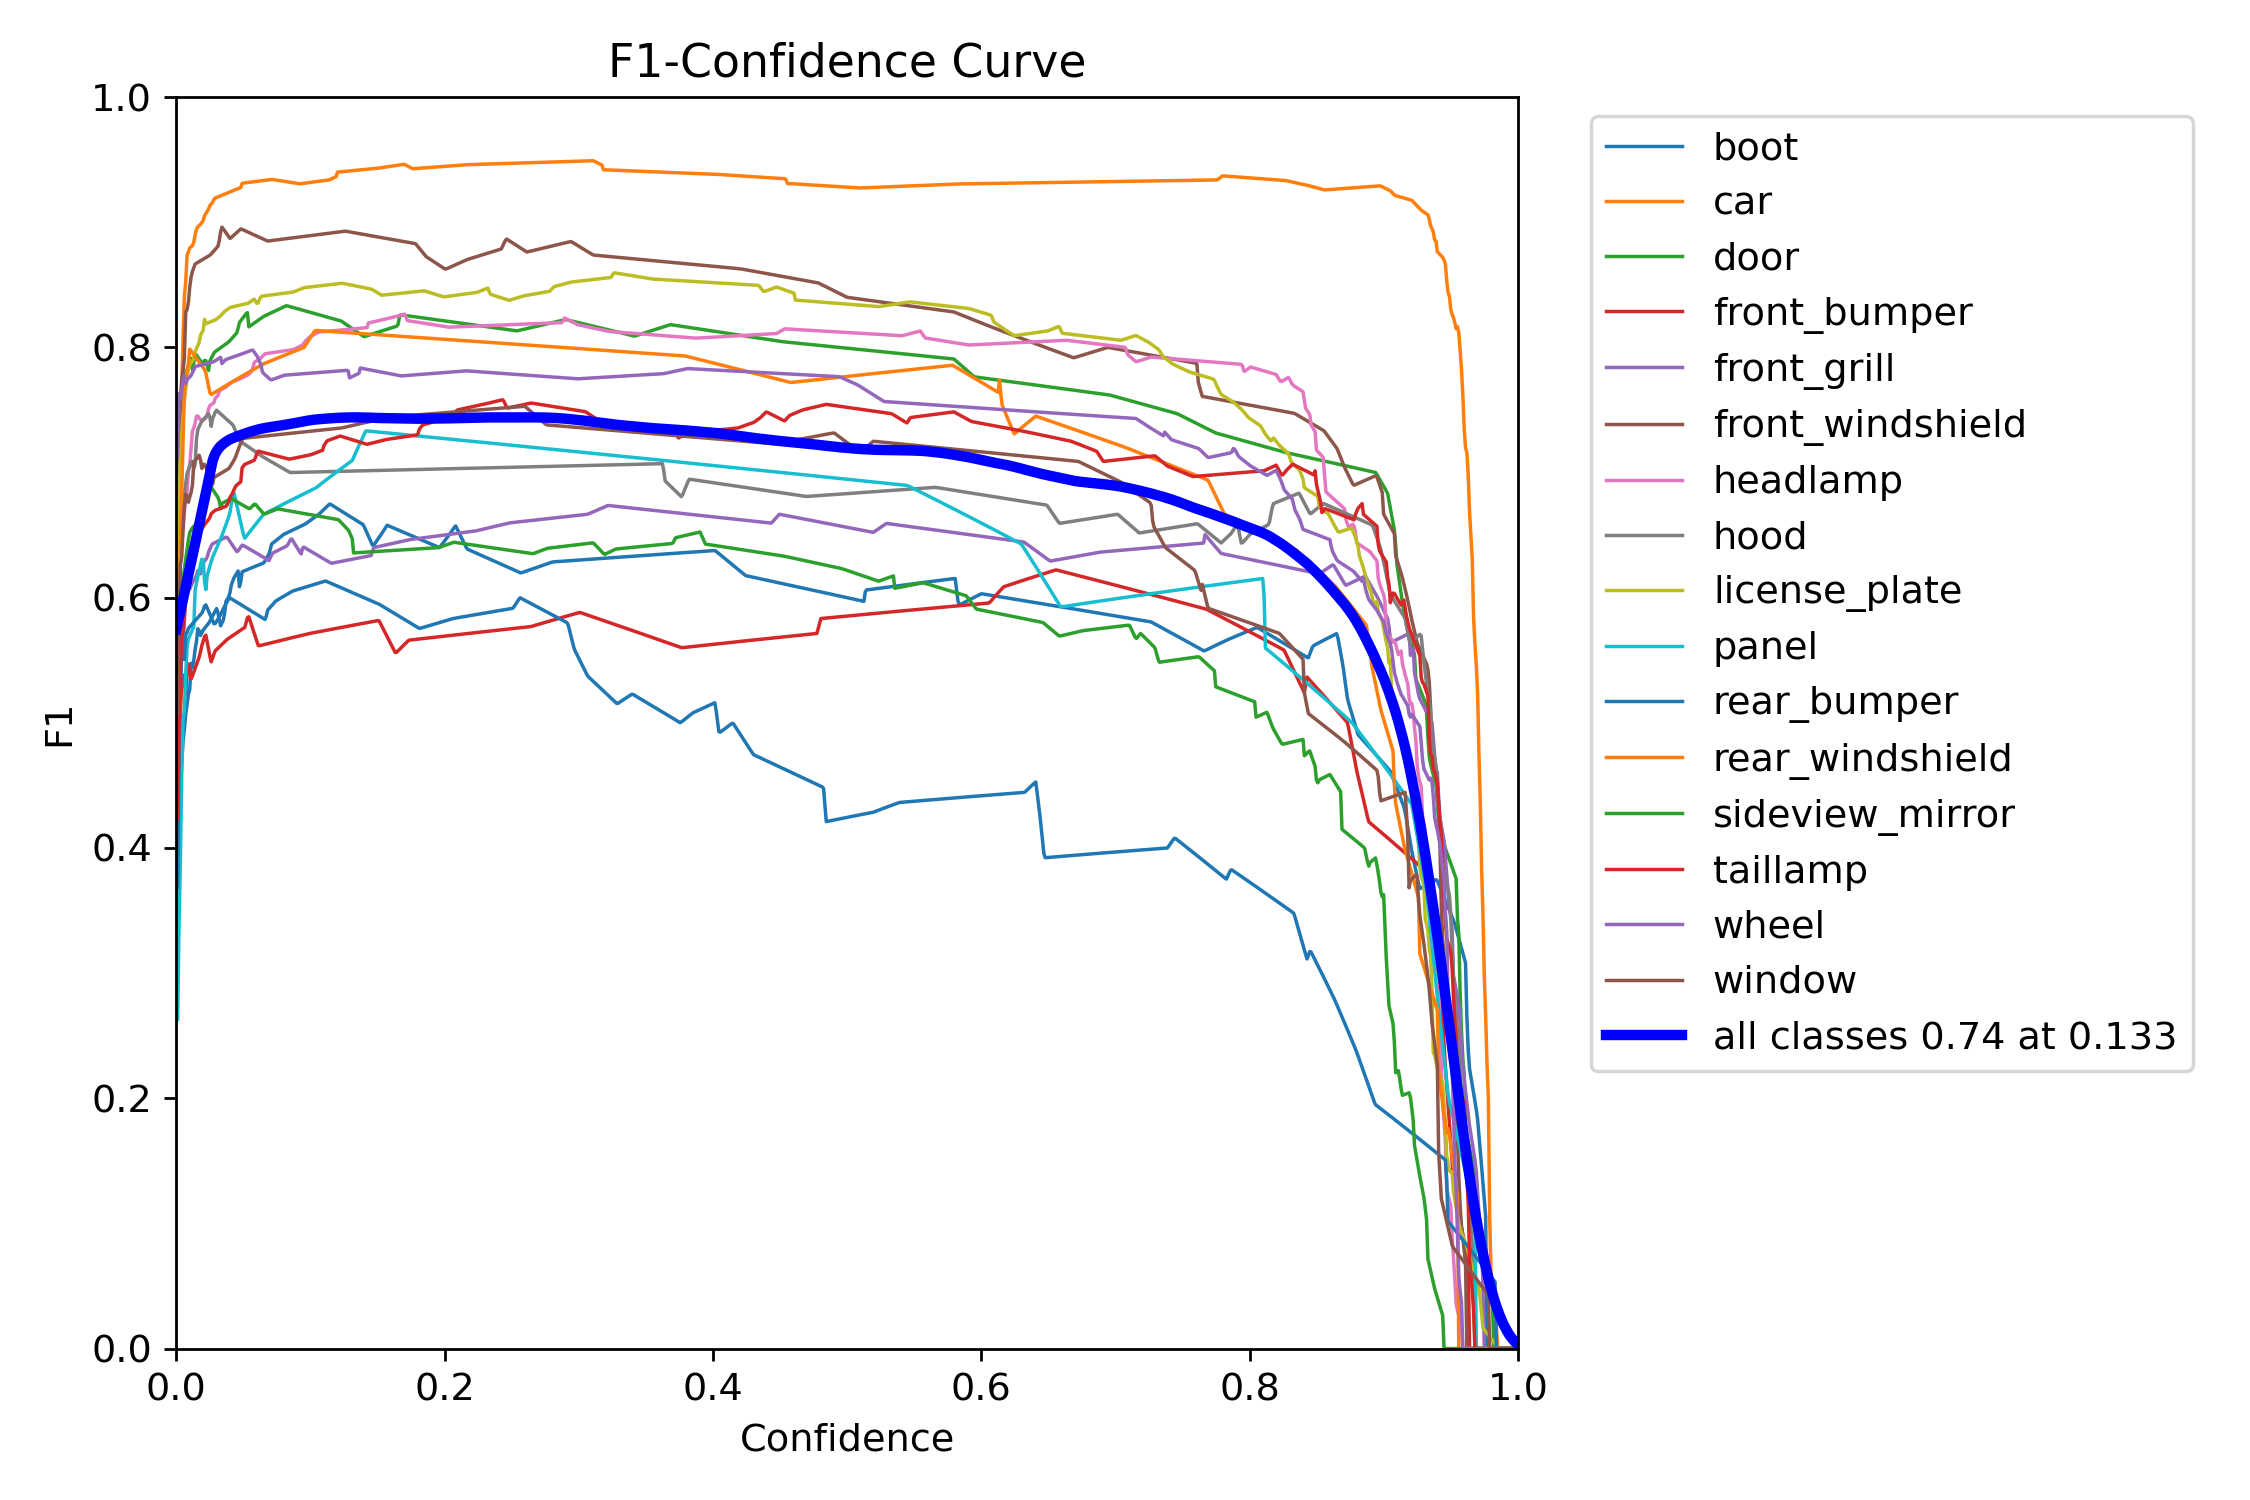

In [12]:
display.Image("/content/drive/MyDrive/Learner Space/ML/Assignment_2/runs/detect/train/F1_curve.png", width=700)

### The Precision - Recall Curve

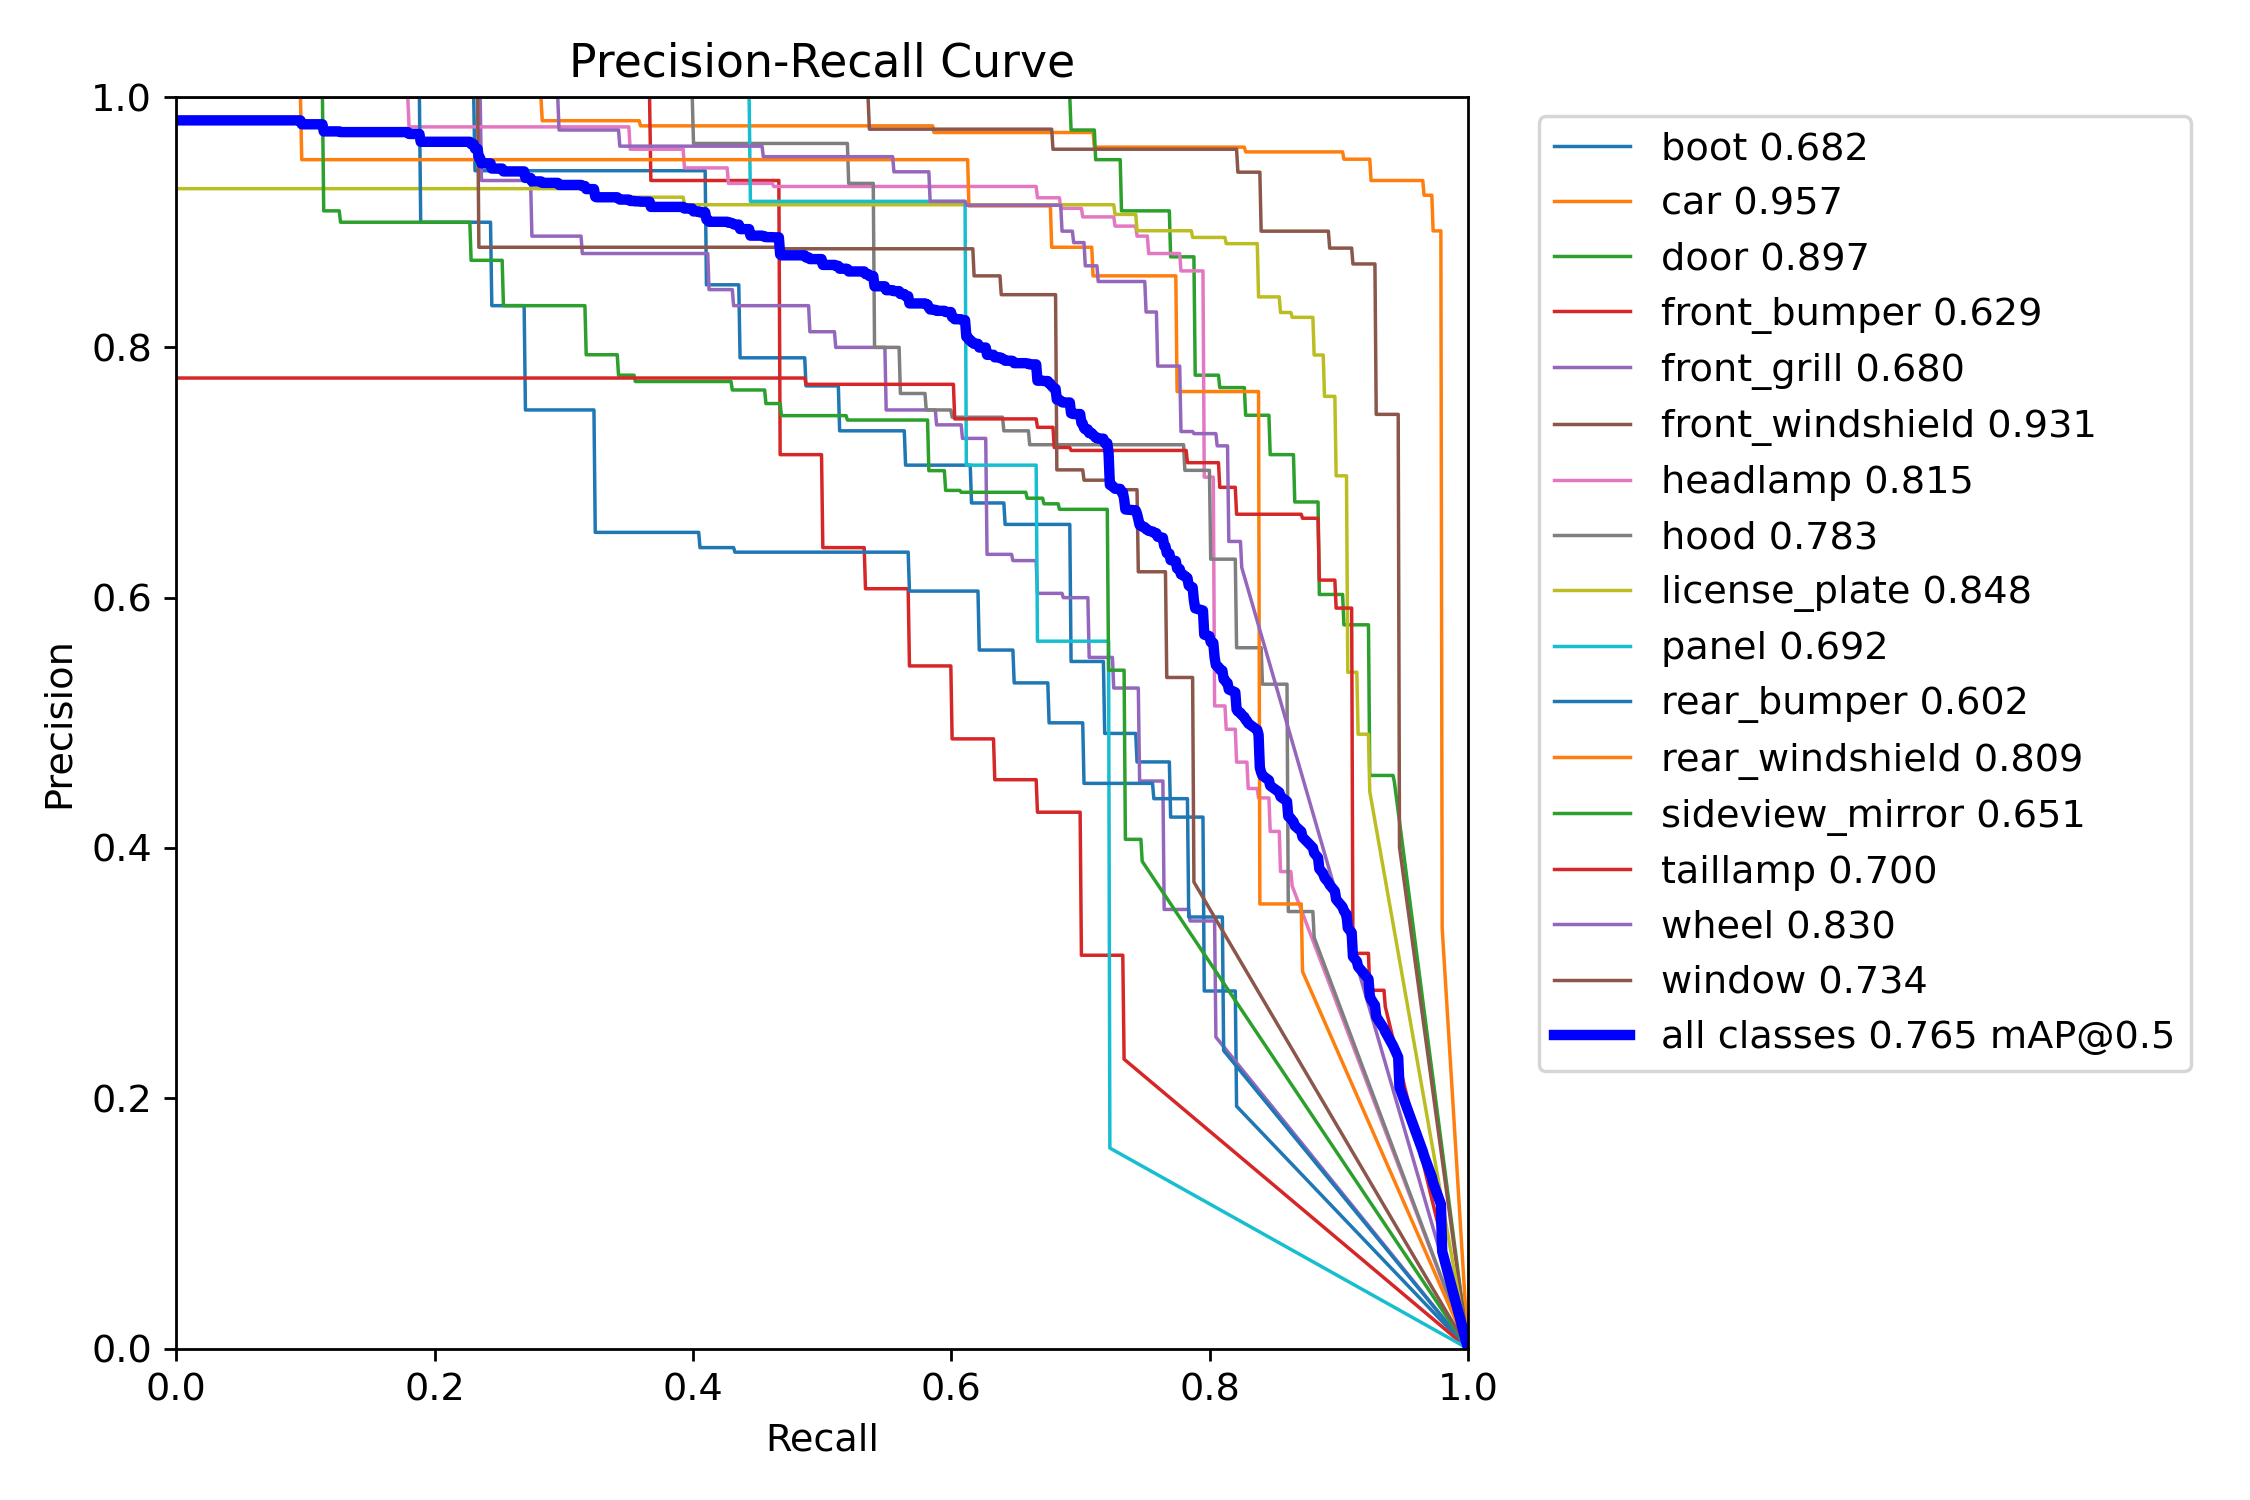

In [13]:
display.Image("/content/drive/MyDrive/Learner Space/ML/Assignment_2/runs/detect/train/PR_curve.png", width=700)

### The Precision - Confidence Curve

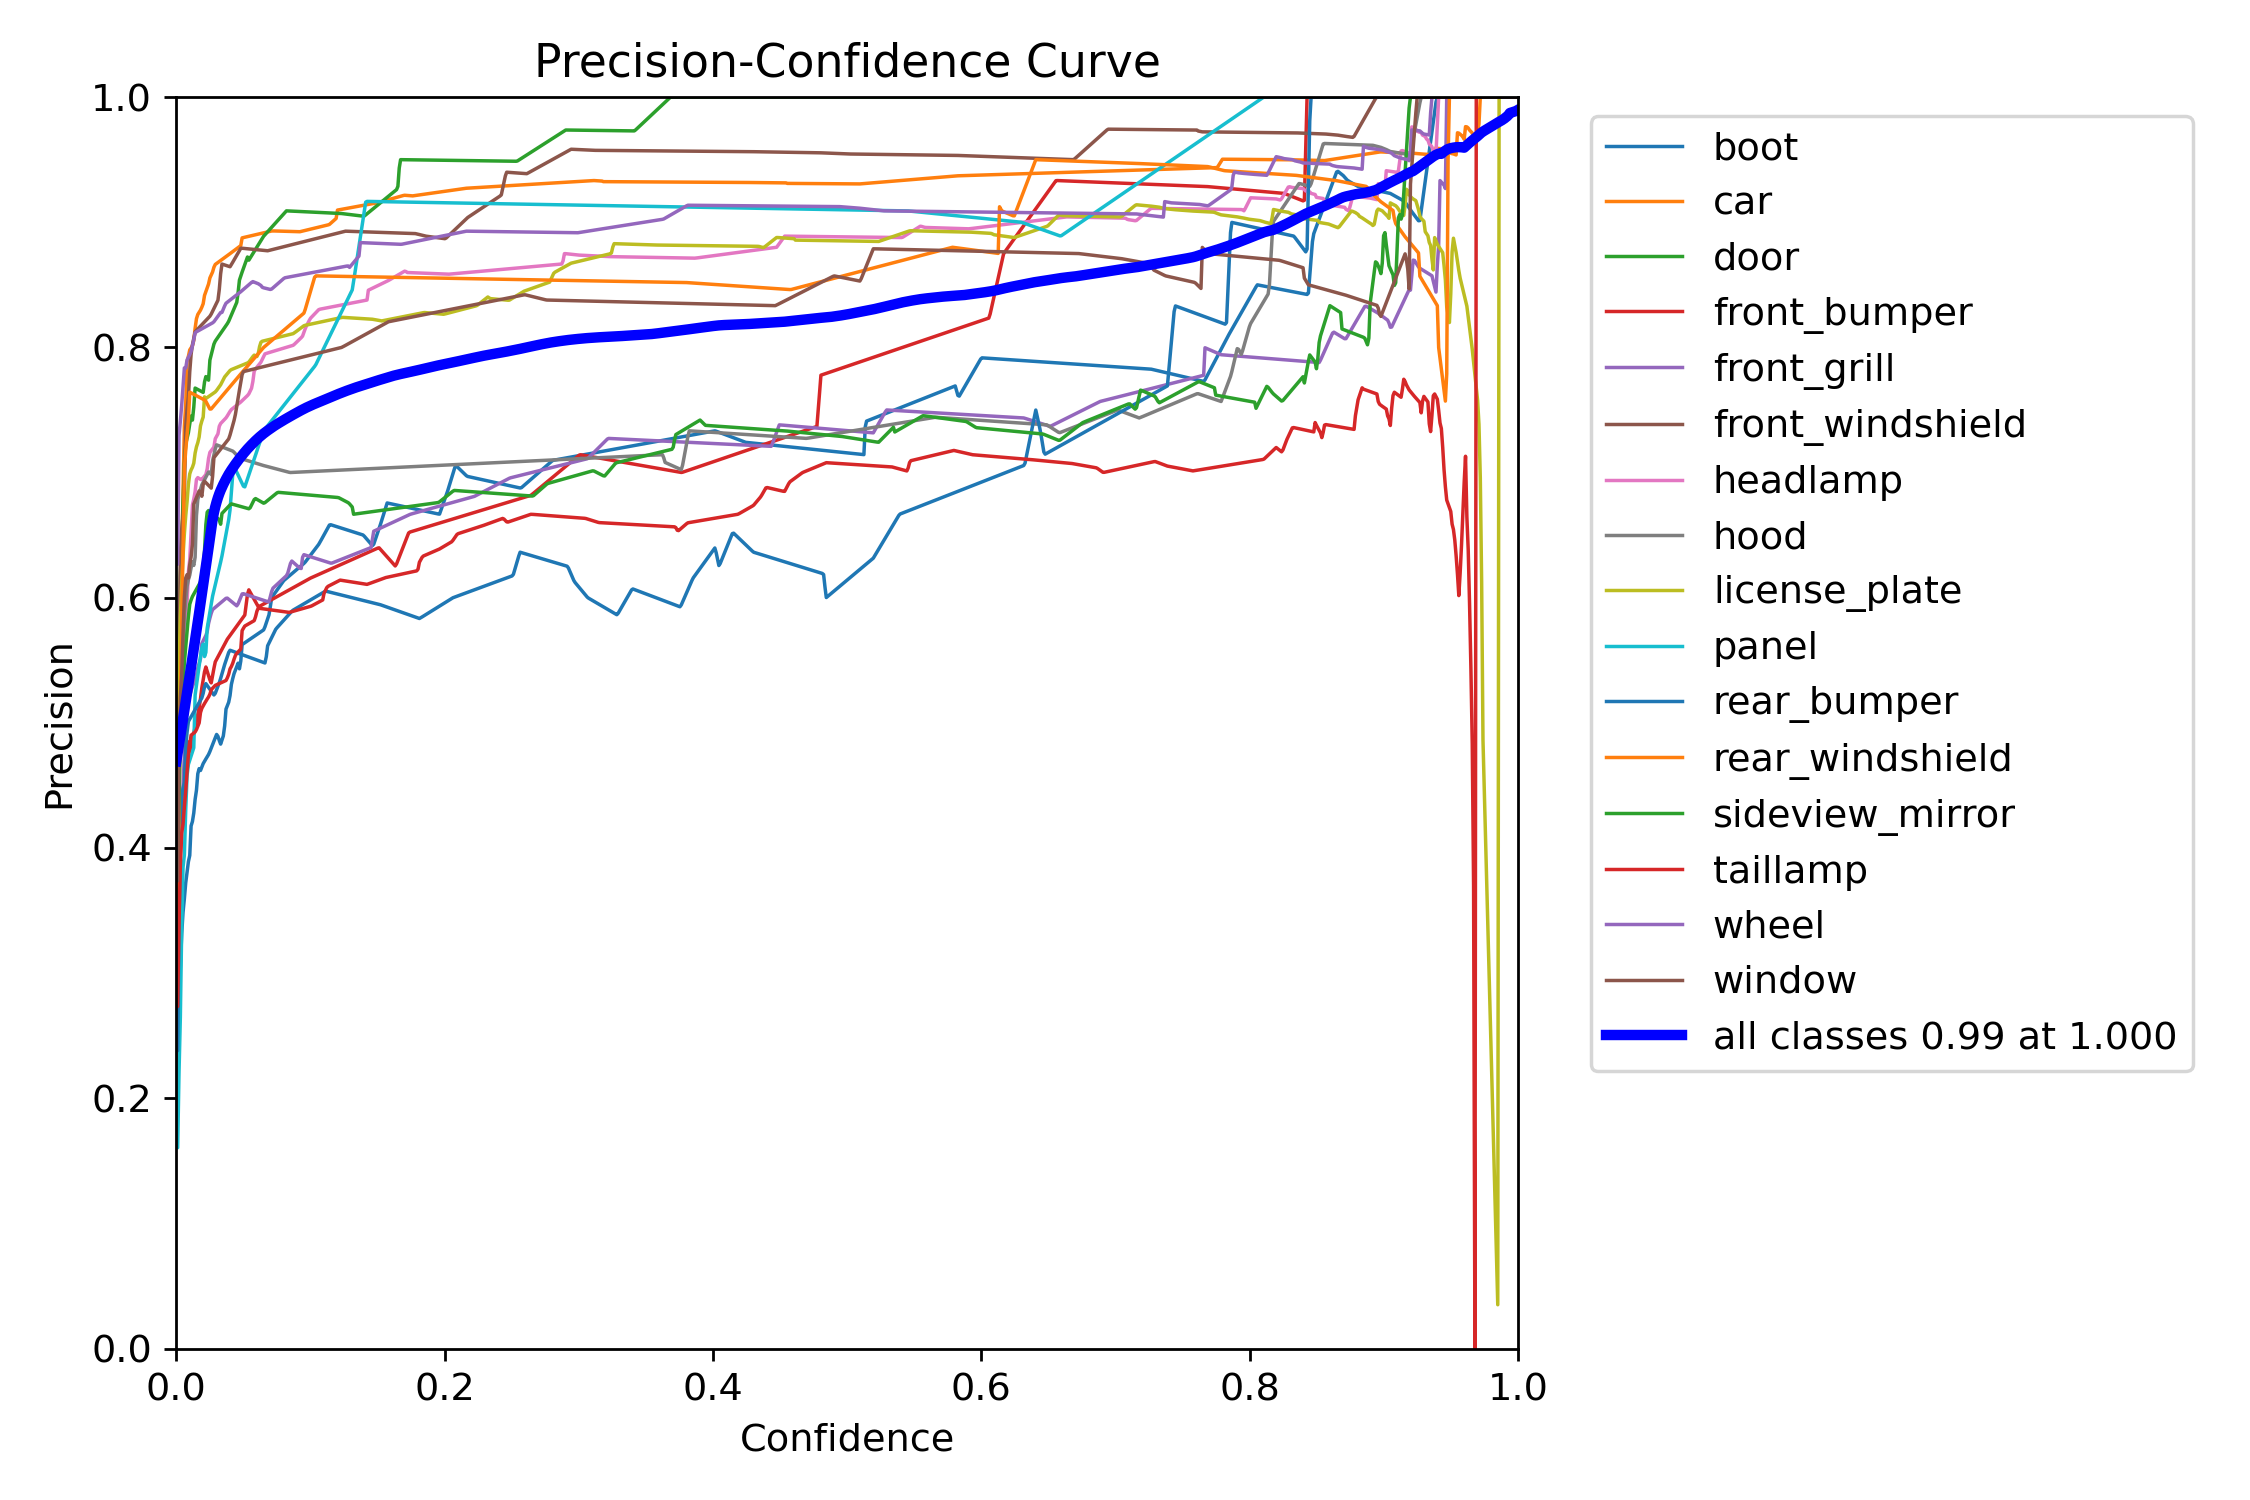

In [14]:
display.Image("/content/drive/MyDrive/Learner Space/ML/Assignment_2/runs/detect/train/P_curve.png", width=700)

### The Recall - Confidence Curve

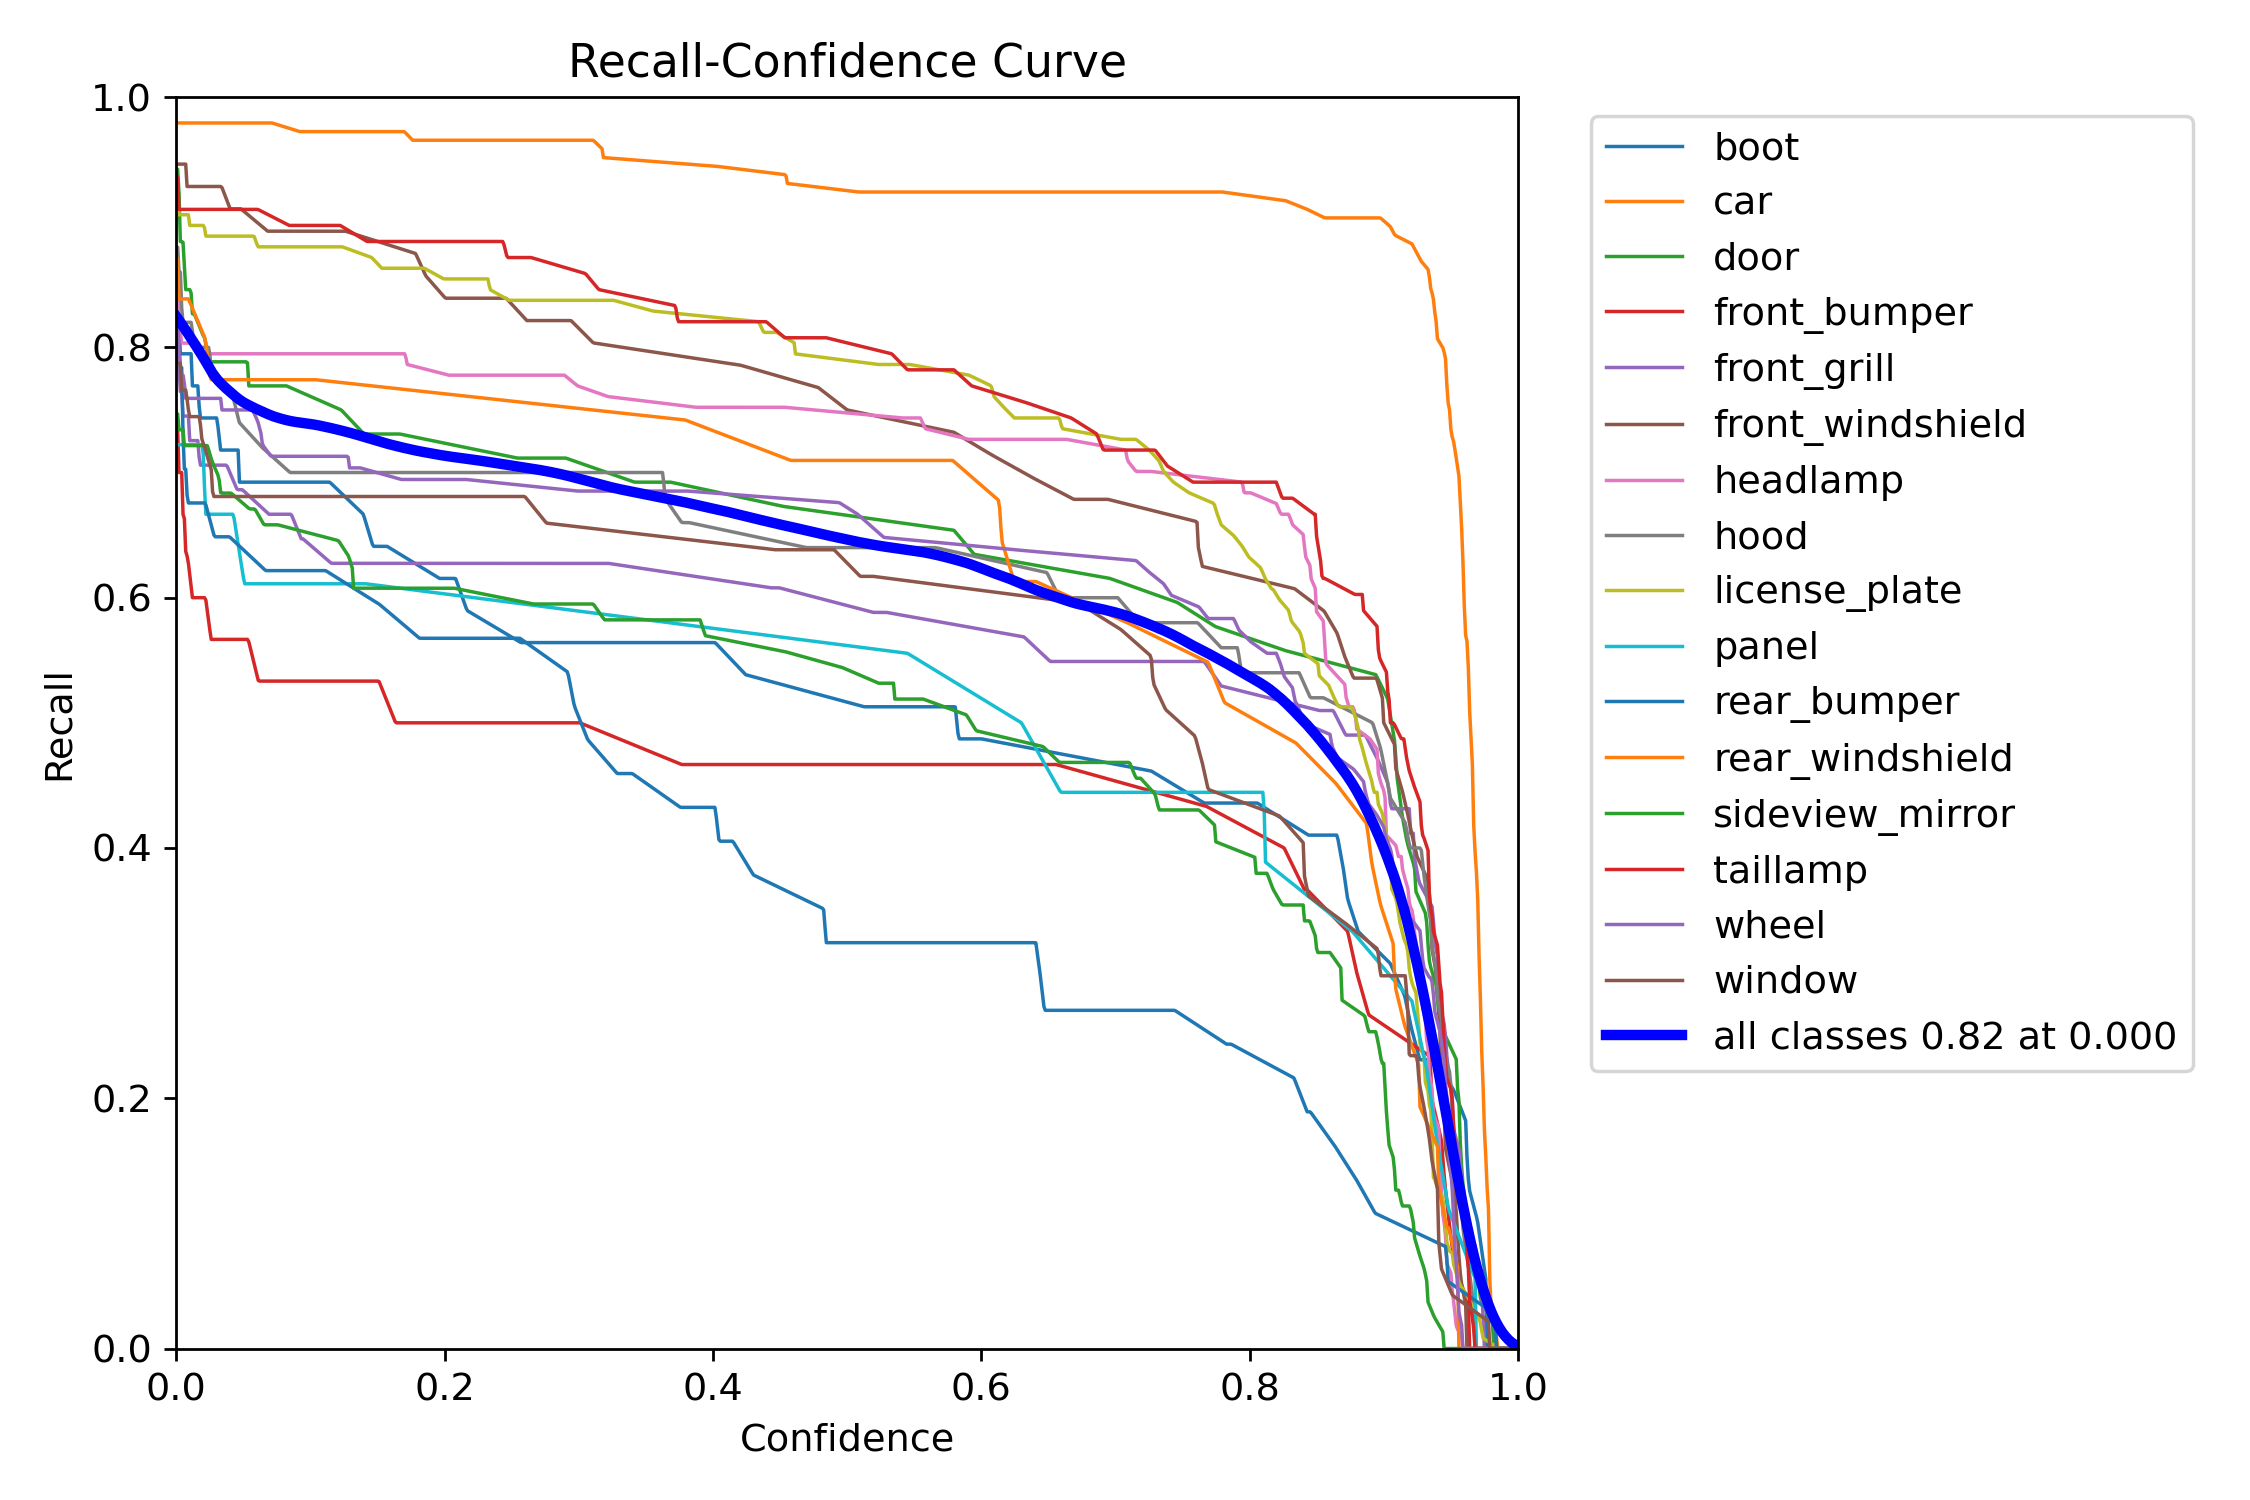

In [15]:
display.Image("/content/drive/MyDrive/Learner Space/ML/Assignment_2/runs/detect/train/R_curve.png", width=700)

### The Confusion Matrix

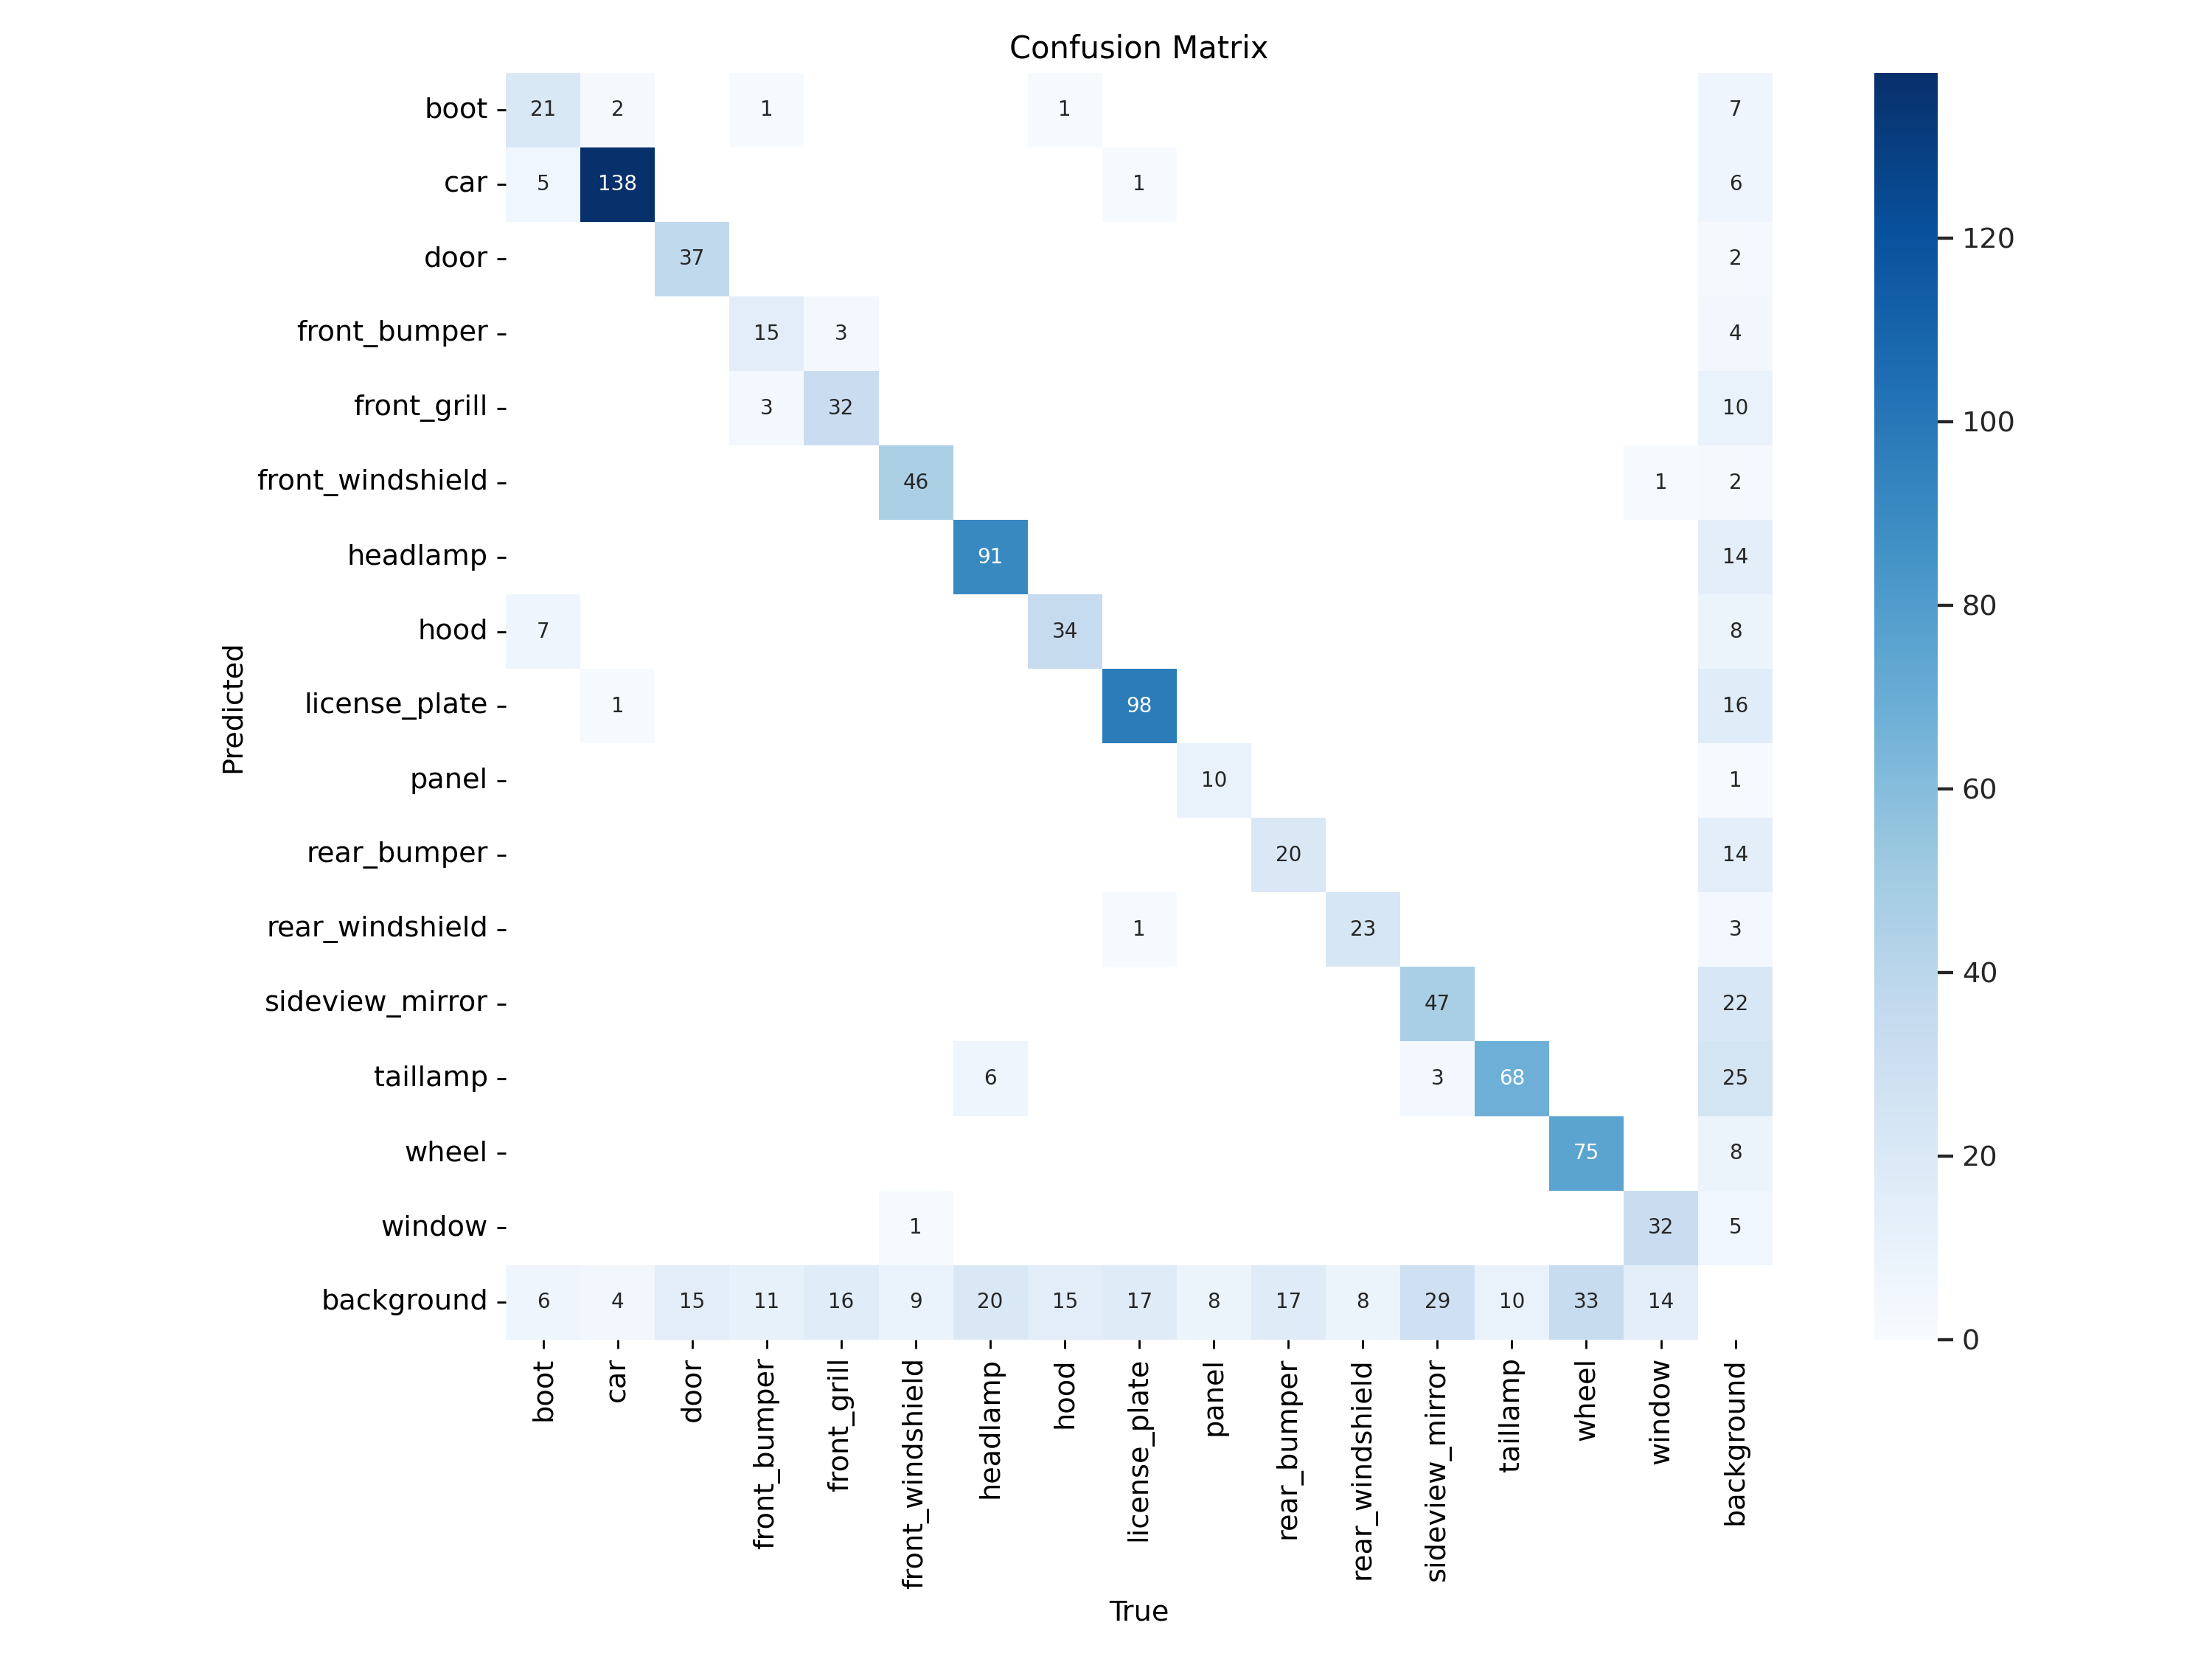